In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import nichepca as npc
import torch

from src.utilities import *

from collections import Counter
import random
from tqdm import tqdm 

device = "cpu"
torch.set_num_threads(100)

seed = 200
torch.manual_seed(seed)

/home/byousefi/envs/nichepca/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
save_path = "data/"
data_path = "/data/projects/robin/segmentation/xenium_outs/merged_processed_cleaned.h5ad"

In [3]:
# Read data
adata = sc.read_h5ad(data_path)

In [21]:
adata.obs['sample'] = [i.split('_')[0] for i in adata.obs['Patient_Sample_ID']]
sample_set = adata.obs['sample'].unique()
sample_set

array(['X40', 'X39', 'X38', 'X37', 'X36', 'X35', 'X34', 'X33', 'X63',
       'X61', 'X62', 'X60', 'X59', 'X58', 'X57', 'X32', 'X31', 'X30',
       'X29', 'X28', 'X27', 'X26', 'X25', 'X56', 'X55', 'X54', 'X53',
       'X52', 'X50', 'X51', 'X49', 'X8', 'X7', 'X6', 'X4', 'X5', 'X2',
       'X3', 'X1', 'X48', 'X47', 'X46', 'X45', 'X44', 'X43', 'X42', 'X41',
       'X16', 'X15', 'X14', 'X12', 'X13', 'X11', 'X10', 'X9', 'X24',
       'X23', 'X22', 'X21', 'X20', 'X19', 'X18', 'X17'], dtype=object)

In [ ]:
# run domain pca
for sample in tqdm(sample_set):
    adata_sample = adata[adata.obs['sample'] == sample]
    
    npc.wf.run_nichepca(adata_sample, 
                        knn=5,
                        radius=None,
                        n_comps=30)

    resolutions = np.arange(0.03, 4.0, 0.02)
    resolutions = resolutions.round(4).tolist()
    sc.pp.neighbors(adata_sample, use_rep="X_pca")
    adata_sample, _ = multiple_lediden(adata_sample, resolutions, key_added='leiden', n_jobs=20, verbos=False)

    adata_sample.write_h5ad(f"data/adata_nichepca_sample_{sample}_clustered.h5ad")

  0%|          | 0/63 [00:00<?, ?it/s]/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/utils/_helper.py:79: UserWarning: adata.X might not contain raw counts!
adata.X.max() = 3.3151423931121826, adata.X.sum() = 624151.875
  warn(
/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


----------- Graph Stats -----------
Number of nodes: 31336
Number of edges: 212506
Average in-degree: 6.781529426574707
Average out-degree: 6.781529426574707
Contains self-loops: True
Is undirected: True


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 103583
Number of edges: 700787
Average in-degree: 6.765463352203369
Average out-degree: 6.765463352203369
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 40527
Number of edges: 274605
Average in-degree: 6.775853157043457
Average out-degree: 6.775853157043457
Contains self-loops: True
Is undirected: True


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 53355
Number of edges: 360625
Average in-degree: 6.758973121643066
Average out-degree: 6.758973121643066
Contains self-loops: True
Is undirected: True


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 54631
Number of edges: 368887
Average in-degree: 6.752338409423828
Average out-degree: 6.752338409423828
Contains self-loops: True
Is undirected: True


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 32350
Number of edges: 220498
Average in-degree: 6.816012382507324
Average out-degree: 6.816012382507324
Contains self-loops: True
Is undirected: True


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 69153
Number of edges: 468483
Average in-degree: 6.7745866775512695
Average out-degree: 6.7745866775512695
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 43964
Number of edges: 301994
Average in-degree: 6.869120121002197
Average out-degree: 6.869120121002197
Contains self-loops: True
Is undirected: True


/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = r, key_added = key_added + "_res_" + str(r), random_state = random_state)
/data/projects/Behnam/xenium-cgn/notebooks/06_domain_identification/src/utilities.py:42: FutureWarning: In the

----------- Graph Stats -----------
Number of nodes: 92612
Number of edges: 622766
Average in-degree: 6.72446346282959
Average out-degree: 6.72446346282959
Contains self-loops: True
Is undirected: True


/home/byousefi/envs/nichepca/lib/python3.10/site-packages/nichepca/graph_construction/_spatial_graph.py:127: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["graph"] = {}


In [ ]:
resolution_best = .1

sc.pl.pca(
    adata_sample,
    color="leiden_res_"+str(resolution_best),
        wspace=0.4,
)

/home/byousefi/envs/nichepca/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


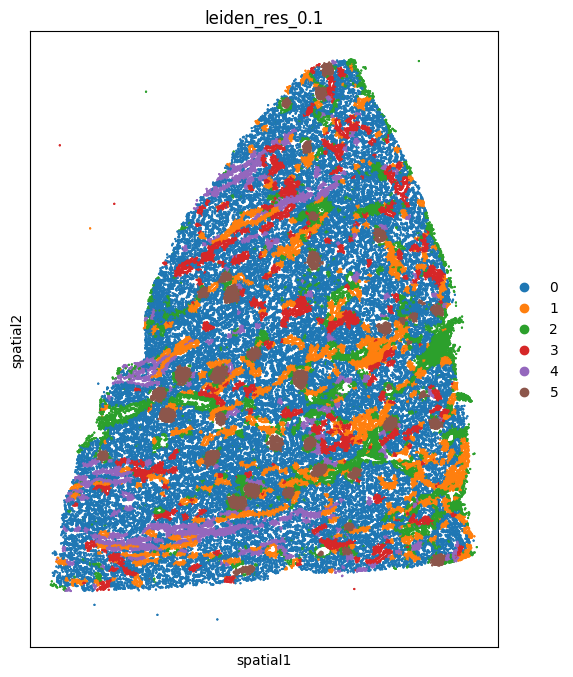

In [20]:
# adata_i.uns.pop(f'leiden_{resolution_best}_colors');
resolution_best = .1

fig, ax = plt.subplots(figsize=(8, 8))

sq.pl.spatial_scatter(
    adata_sample,
    library_id="spatial",
    shape=None,
    color="leiden_res_"+str(resolution_best),
    wspace=0.1,
    ax = ax
)

In [ ]:
adata_sample.obs['is_glom'] = '0'
adata_sample.obs.loc[adata_sample.obs['leiden_res_0.2'] == '6', 'is_glom'] = '1'

In [ ]:
# adata_i.uns.pop(f'leiden_{resolution_best}_colors');

fig, ax = plt.subplots(figsize=(8, 8))
sq.pl.spatial_scatter(
    adata_sample,
    library_id="spatial",
    shape=None,
    color='is_glom',
    wspace=0.1,
    ax = ax
)

In [ ]:
adata_sample.write(f"data/adata_nichepca_sample_{sample}_clustered.h5ad")
f"data/adata_nichepca_sample_{sample}_clustered.h5ad"

In [22]:
adata_sample

AnnData object with n_obs × n_vars = 91118 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap', 'graph', 'leiden_res_0.1_colors', 'leiden_res_0.2_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [43]:
resolutions = np.arange(0.03, 4.0, 0.02)

In [44]:
len(resolutions)

199

In [40]:
resolutions

array([0.03, 0.13, 0.23, 0.33, 0.43, 0.53, 0.63, 0.73, 0.83, 0.93, 1.03,
       1.13, 1.23, 1.33, 1.43, 1.53, 1.63, 1.73, 1.83, 1.93, 2.03, 2.13,
       2.23, 2.33, 2.43, 2.53, 2.63, 2.73, 2.83, 2.93, 3.03, 3.13, 3.23,
       3.33, 3.43, 3.53, 3.63, 3.73, 3.83, 3.93])